(30, 120, 1, 1, 40, 1, 1)


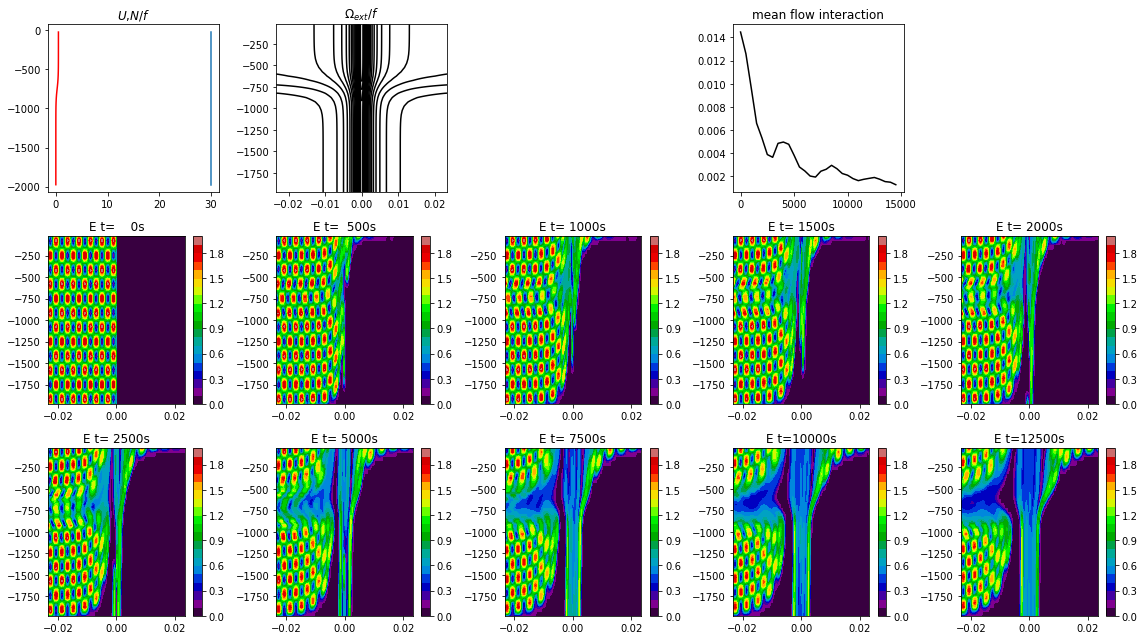

In [4]:
import numpy as np
import pylab as plt


from netCDF4 import Dataset as NF

ifid=NF('snap6D.cdf',mode='r')
mt = ifid.variables['mt'][:]
zt = ifid.variables['zt'][:]
lt = ifid.variables['lt'][:]
t  = ifid.variables['Time'][:]
E =  ifid.variables['E'][:]
meanfl =  ifid.variables['meanfl'][:]
mdot =  ifid.variables['mdot'][:]
zdot =  ifid.variables['zdot'][:]
om_i =  ifid.variables['omega_i'][:]
om_e =  ifid.variables['omega_e'][:]
ifid.close()

ifid=NF('snap3D.cdf',mode='r')
mflint =  ifid.variables['mflint'][:]
bfl_ms =  ifid.variables['bflux_ms'][:]
bfl_me =  ifid.variables['bflux_me'][:]
Nsqr =  ifid.variables['Nsqr'][:]
U =  ifid.variables['U'][:]


ifid.close()

print (E.shape)

k,l,x,y = 0,0,0,0

cm=plt.get_cmap('nipy_spectral')

plt.figure(figsize=(16,9),tight_layout=True)

ax = plt.subplot(3,5,1)
ax.plot(np.sqrt(Nsqr[:,y,x])/1e-4,zt) 
ax.plot(U[:,y],zt,'r') 
ax.set_title('$U$,$N/f$')

ax = plt.subplot(3,5,2)
co = ax.contour(mt,zt,om_e[:,l,k,:,y,x].transpose()/1e-4,30,colors='k')
#plt.colorbar(co)
ax.set_title('$\Omega_{ext}/f$')


ax = plt.subplot(3,5,4)
ax.plot(t,mflint,'k')
ax.set_title('mean flow interaction')
#ax.plot(t,bfl_ms,'r')
#ax.plot(t,bfl_me,'r--')


E = np.where( E<0.1, 0.1,E )
cr = np.arange(0,2.1,0.1)

ax = plt.subplot(3,5,6)
co = ax.contourf(mt,zt, E[0,:,l,k,:,y,x].transpose(),cr,cmap=cm) 
plt.colorbar(co)
ax.set_title('E t=%5.0fs'%t[0])

ax = plt.subplot(3,5,7)
co = ax.contourf(mt,zt,E[1,:,l,k,:,y,x].transpose(),cr,cmap=cm)
plt.colorbar(co)
ax.set_title('E t=%5.0fs'%t[1])
ax = plt.subplot(3,5,8)
co = ax.contourf(mt,zt,E[2,:,l,k,:,y,x].transpose(),cr,cmap=cm)
plt.colorbar(co)
ax.set_title('E t=%5.0fs'%t[2])

ax = plt.subplot(3,5,9)
co = ax.contourf(mt,zt,E[3,:,l,k,:,y,x].transpose(),cr,cmap=cm)
plt.colorbar(co)
ax.set_title('E t=%5.0fs'%t[3])
ax = plt.subplot(3,5,10)
co = ax.contourf(mt,zt,E[4,:,l,k,:,y,x].transpose(),cr,cmap=cm)
plt.colorbar(co)
ax.set_title('E t=%5.0fs'%t[4])
if 1:
 ax = plt.subplot(3,5,11)
 co = ax.contourf(mt,zt,E[5,:,l,k,:,y,x].transpose(),cr,cmap=cm)
 plt.colorbar(co)
 ax.set_title('E t=%5.0fs'%t[5])
 ax = plt.subplot(3,5,12)
 co = ax.contourf(mt,zt,E[10,:,l,k,:,y,x].transpose(),cr,cmap=cm)
 plt.colorbar(co)
 ax.set_title('E t=%5.0fs'%t[10])
 ax = plt.subplot(3,5,13)
 co = ax.contourf(mt,zt,E[15,:,l,k,:,y,x].transpose(),cr,cmap=cm)
 plt.colorbar(co)
 ax.set_title('E t=%5.0fs'%t[15])
 ax = plt.subplot(3,5,14)
 co = ax.contourf(mt,zt,E[20,:,l,k,:,y,x].transpose(),cr,cmap=cm)
 plt.colorbar(co)
 ax.set_title('E t=%5.0fs'%t[20])
 ax = plt.subplot(3,5,15)
 co = ax.contourf(mt,zt,E[25,:,l,k,:,y,x].transpose(),cr,cmap=cm)
 plt.colorbar(co)
 ax.set_title('E t=%5.0fs'%t[25])



plt.savefig('tmp.png')
plt.show()